In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Github_Data_2019_ready_for_text_analysis.csv')

In [3]:
df.head()

,Unnamed: 0,id,node_id,name,full_name,private,html_url,description,fork,url,...,owner.received_events_url,owner.type,owner.site_admin,license.key,license.name,license.spdx_id,license.url,license.node_id,lang,clean
0,0,167620884,MDEwOlJlcG9zaXRvcnkxNjc2MjA4ODQ=,devtraining-needit-madrid,SmashDummies/devtraining-needit-madrid,False,https://github.com/SmashDummies/devtraining-ne...,This repository is used by the developer site ...,False,https://api.github.com/repos/SmashDummies/devt...,...,https://api.github.com/users/SmashDummies/rece...,User,False,NaN,NaN,NaN,NaN,NaN,en,repository used developer site training conten...
1,4,165085610,MDEwOlJlcG9zaXRvcnkxNjUwODU2MTA=,MyFirstPullRequest,COGS108/MyFirstPullRequest,False,https://github.com/COGS108/MyFirstPullRequest,To be used for the assignments in Cogs 108,False,https://api.github.com/repos/COGS108/MyFirstPu...,...,https://api.github.com/users/COGS108/received_...,Organization,False,NaN,NaN,NaN,NaN,NaN,en,used assignments cogs 108
2,5,186485725,MDEwOlJlcG9zaXRvcnkxODY0ODU3MjU=,mslearn-tailspin-spacegame-web-models,MicrosoftDocs/mslearn-tailspin-spacegame-web-m...,False,https://github.com/MicrosoftDocs/mslearn-tails...,Code used in Microsoft Learn modules to suppor...,False,https://api.github.com/repos/MicrosoftDocs/msl...,...,https://api.github.com/users/MicrosoftDocs/rec...,Organization,False,other,Other,NOASSERTION,NaN,MDc6TGljZW5zZTA=,en,code used microsoft learn modules support azur...
3,6,196292268,MDEwOlJlcG9zaXRvcnkxOTYyOTIyNjg=,github-usercard,LambdaSchool/github-usercard,False,https://github.com/LambdaSchool/github-usercard,Create a card based on the data coming back fr...,False,https://api.github.com/repos/LambdaSchool/gith...,...,https://api.github.com/users/LambdaSchool/rece...,Organization,False,NaN,NaN,NaN,NaN,NaN,en,create card based data coming back github api
4,18,203418584,MDEwOlJlcG9zaXRvcnkyMDM0MTg1ODQ=,JS-Exercise-Prototype,LambdaSchool/JS-Exercise-Prototype,False,https://github.com/LambdaSchool/JS-Exercise-Pr...,An exercise for JS constructor functions.,False,https://api.github.com/repos/LambdaSchool/JS-E...,...,https://api.github.com/users/LambdaSchool/rece...,Organization,False,NaN,NaN,NaN,NaN,NaN,en,exercise js constructor functions


# Numerical Data

In [5]:
df[['watchers_count', 'size', 'forks_count', 'open_issues']].describe()

,watchers_count,size,forks_count,open_issues
count,209.000000,209.000000,209.000000,209.000000
mean,18.909091,8615.023923,489.822967,67.645933
std,51.994789,33754.808007,720.045119,281.806209
min,0.000000,0.000000,152.000000,0.000000
25%,1.000000,40.000000,200.000000,0.000000
50%,4.000000,238.000000,289.000000,4.000000
75%,13.000000,1526.000000,516.000000,39.000000
max,470.000000,267242.000000,8200.000000,3715.000000


# Top technologies

In [6]:
# Identifying the most popular phrases related to technologies by 
# focusing on most frequent bigrams

import nltk         
from nltk.collocations import *      #implements n-gram search tools

In [7]:
list_documents = df['clean'].apply(lambda x : x.split()).tolist()
# here list_documents is a list of lists containing words in the column 'clean'

In [8]:
# finding bigrams document-wise and avoiding corpus wise by using from_documents

bigram_measures = nltk.collocations.BigramAssocMeasures()
bigram_finder = BigramCollocationFinder.from_documents(list_documents)

In [9]:
bigram_finder.apply_freq_filter(3)  #considering bigrams with at least three occurences

In [10]:
bigrams = bigram_finder.nbest(bigram_measures.raw_freq, 20)
# we get top 20 bigrams according to raw_freq measure

In [11]:
# now we find scores of these bigrams i.e. (here) the frequency corresponding to each

scores = bigram_finder.score_ngrams(bigram_measures.raw_freq)

In [12]:
ngram = list(bigram_finder.ngram_fd.items())   # bigram_finder.ngram_fd is a dictionary

In [13]:
ngram.sort(key = lambda item: item[-1], reverse = True)

In [14]:
ngram[:10]

[(('guided', 'project'), 12),
 (('starter', 'code'), 7),
 (('azure', 'devops'), 6),
 (('project', 'web'), 6),
 (('open', 'source'), 6),
 (('code', 'used'), 5),
 (('used', 'microsoft'), 5),
 (('microsoft', 'learn'), 5),
 (('learn', 'modules'), 5),
 (('modules', 'support'), 5)]

In [15]:
frequency = [(' '.join(k), v) for k, v in ngram]

# this just joins the tuple containing bigrams

In [16]:
df = pd.DataFrame(frequency)

In [17]:
df.head()

,0,1
0,guided project,12
1,starter code,7
2,azure devops,6
3,project web,6
4,open source,6


In [18]:
import matplotlib.pyplot as plt

In [19]:
plt.style.use('ggplot')

In [20]:
df.set_index([0], inplace = True)
df.head()

,1
0,
guided project,12
starter code,7
azure devops,6
project web,6
open source,6


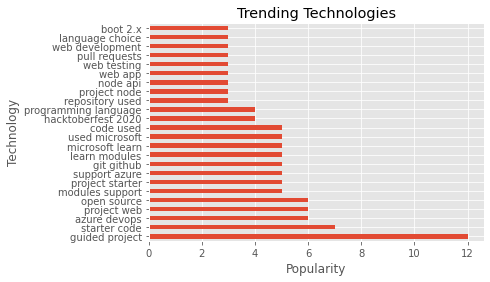

In [21]:
df.sort_values(by = [1], ascending = False).head(25).plot(kind = 'barh')
plt.title('Trending Technologies')
plt.ylabel('Technology')
plt.xlabel('Popularity')
plt.legend().set_visible(False)
plt.show()